<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_5/Module_5_1_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

Using: Iris Dataset: https://www.kaggle.com/datasets/uciml/iris

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np

In [2]:
# Load the iris dataset (for simplicity)
# sepal - Чашолисток (2)
# petal - Пелюстка (3)
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

![flower](https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Bluete-Schema.svg/1920px-Bluete-Schema.svg.png)

In [3]:
X = iris.data[:, :2]
y = iris.target
X[:10]  # чашолисток: довжина і ширина

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [4]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

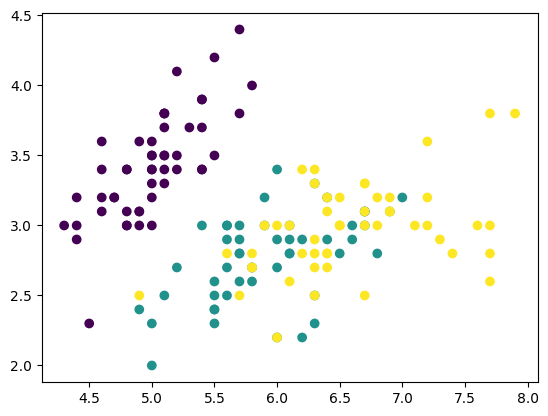

In [5]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

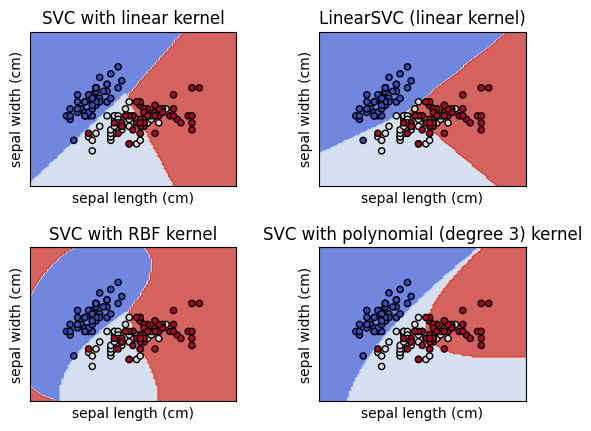

In [6]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Simple example

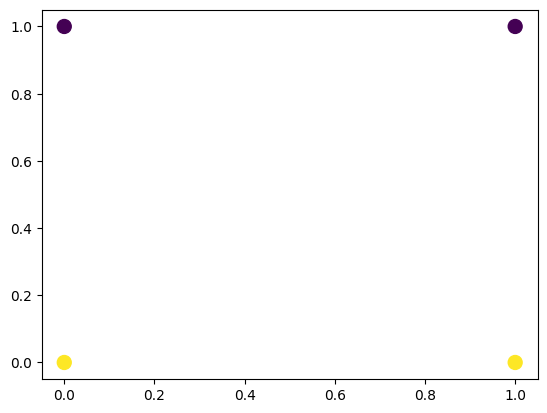

In [8]:
X = np.array([
    [1, 1],
    [0, 0],
    [1, 0],
    [0, 1],
])
y = np.array([0, 1, 1, 0])
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1, cmap='viridis')
plt.show()

In [10]:
model = SVC(kernel="linear")
model.fit(X, y)
model.decision_function(X)

array([-1.,  1.,  1., -1.])

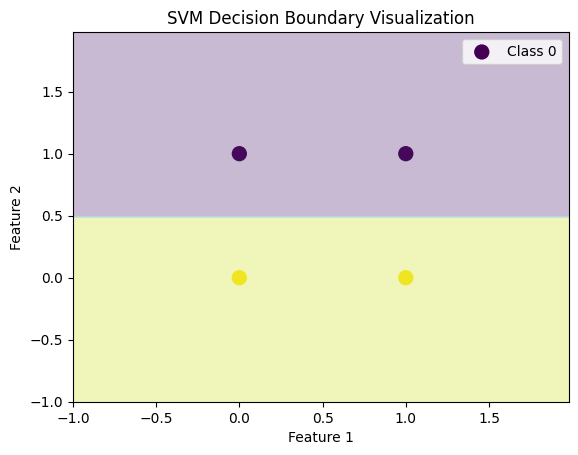

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X = np.array([
    [1, 1],
    [0, 0],
    [1, 0],
    [0, 1],
])
y = np.array([0, 1, 1, 0])

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1, cmap='viridis')

# Create a meshgrid to generate points for the contour plot
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train an SVM model
model = SVC(kernel="linear")
model.fit(X, y)

# Obtain decision boundary values for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundary as a contour plot
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary Visualization')
plt.legend(labels=["Class 0", "Class 1"])


# Show the plot
plt.show()

In [13]:
model.support_  # indexes of the support vectors

array([0, 3, 1, 2], dtype=int32)

In [14]:
model.support_vectors_  # support vectors
# Support vectors are the elements of the training set that would change the position of the dividing hyperplane if removed.

array([[1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [15]:
model.__dict__

{'decision_function_shape': 'ovr',
 'break_ties': False,
 'kernel': 'linear',
 'degree': 3,
 'gamma': 'scale',
 'coef0': 0.0,
 'tol': 0.001,
 'C': 1.0,
 'nu': 0.0,
 'epsilon': 0.0,
 'shrinking': True,
 'probability': False,
 'cache_size': 200,
 'class_weight': None,
 'verbose': False,
 'max_iter': -1,
 'random_state': None,
 '_sparse': False,
 'n_features_in_': 2,
 'class_weight_': array([1., 1.]),
 'classes_': array([0, 1]),
 '_gamma': np.float64(2.0),
 'support_': array([0, 3, 1, 2], dtype=int32),
 'support_vectors_': array([[1., 1.],
        [0., 1.],
        [0., 0.],
        [1., 0.]]),
 '_n_support': array([2, 2], dtype=int32),
 'dual_coef_': array([[-1., -1.,  1.,  1.]]),
 'intercept_': array([1.]),
 '_probA': array([], dtype=float64),
 '_probB': array([], dtype=float64),
 'fit_status_': 0,
 '_num_iter': array([2], dtype=int32),
 'shape_fit_': (4, 2),
 '_intercept_': array([-1.]),
 '_dual_coef_': array([[ 1.,  1., -1., -1.]]),
 'n_iter_': array([2], dtype=int32)}

In [16]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X)
accuracy_score(y_pred, y)

1.0

### With more data

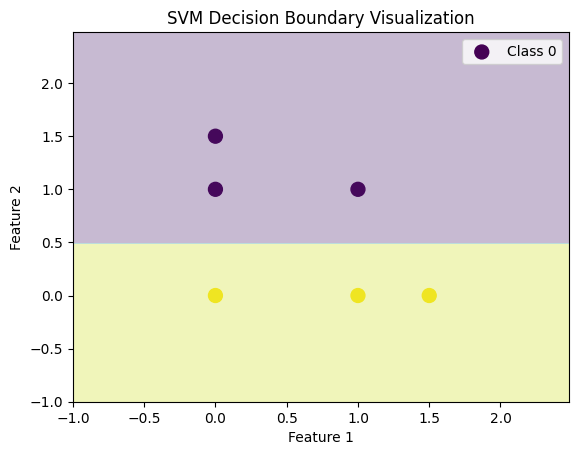

In [17]:
X = np.array([
    [1, 1],
    [0, 0],
    [1, 0],
    [0, 1],
    [1.5, 0],
    [0, 1.5],
])
y = np.array([0, 1, 1, 0, 1, 0])
# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1, cmap='viridis')

# Create a meshgrid to generate points for the contour plot
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train an SVM model
model = SVC(kernel="linear")
model.fit(X, y)

# Obtain decision boundary values for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundary as a contour plot
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary Visualization')
plt.legend(labels=["Class 0", "Class 1"])

# Show the plot
plt.show()

In [18]:
model.support_  # indexes of the support vectors

array([0, 3, 1, 2], dtype=int32)

In [19]:
model.support_vectors_  # support vectors
# Support vectors are the elements of the training set that would change the position of the dividing hyperplane if removed.

array([[1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [20]:
model.decision_function(X), model.predict(X)
# And that is easy to interpret:
# The decision function tells us on which side of the hyperplane generated by the classifier we are
# (and how far we are away from it).
# Based on that information, the estimator then labels the examples with the corresponding label.

(array([-1.,  1.,  1., -1.,  1., -2.]), array([0, 1, 1, 0, 1, 0]))

In [21]:
y_pred = model.predict(X)
accuracy_score(y_pred, y)

1.0

### Iris (Linear)

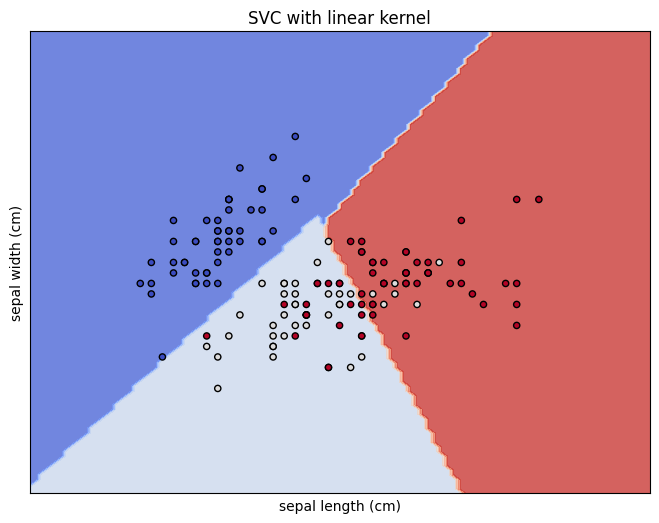

In [22]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

X = iris.data[:, :2]
y = iris.target

C = 1.0  # SVM regularization parameter
model = svm.SVC(kernel="linear", C=C)
model.fit(X, y)

# title for the plots
title = "SVC with linear kernel"

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

X0, X1 = X[:, 0], X[:, 1]

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

In [23]:
y_pred = model.predict(X)
accuracy_score(y_pred, y)

0.82

## Kernel Trick
### Radial Basis Function Kernel
![Kernel-trick](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*fR1j1gotRS5AmKm7wzH9TA.png)

The kernel function is just a mathematical function that converts a low-dimensional input space into a higher-dimensional space. This is done by mapping the data into a new feature space. In this space, the data will be linearly separable. This means that a support vector machine can be used to find a hyperplane that separates the data.

Sources of the examples below:
- https://rstudio-pubs-static.s3.amazonaws.com/754361_059611f87b0b4c9881adb7c8ef0ace7e.html
- https://www.pycodemates.com/2022/10/the-rbf-kernel-in-svm-complete-guide.html

### (Simple) Example 1

In [24]:
X = np.array([
    [1, 1],
    [0, 0],
    [1, 0],
    [0, 1],
])
y = np.array([0, 0, 1, 1])

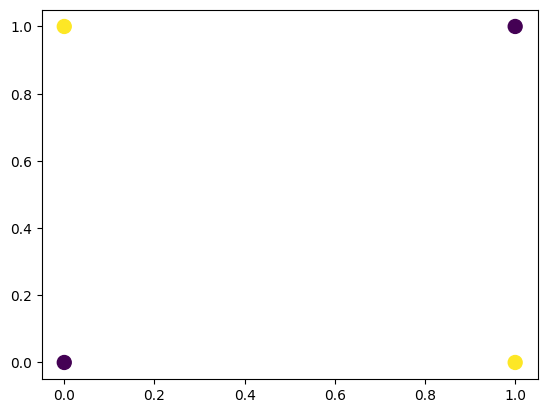

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1)
plt.show()

https://rstudio-pubs-static.s3.amazonaws.com/754361_059611f87b0b4c9881adb7c8ef0ace7e.html

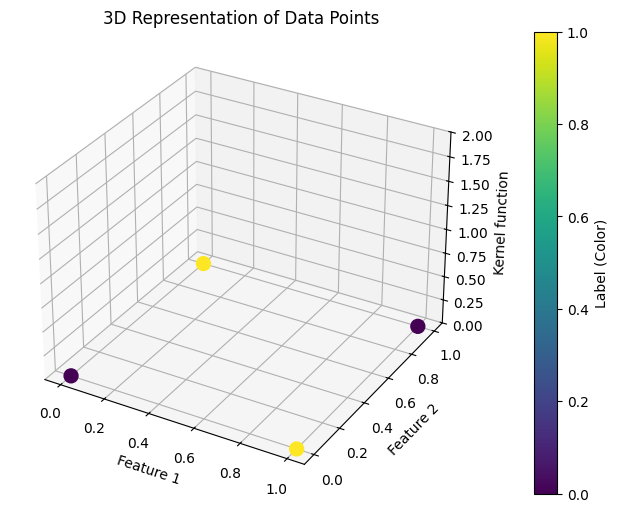

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on labels y
scatter = ax.scatter(X[:, 0], X[:, 1], np.array([0, 0, 0, 0]), c=y, cmap='viridis', s=100, alpha=1)
ax.set_zlim(0, max(y) + 1)
# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Kernel function')
ax.set_title('3D Representation of Data Points')

# Add colorbar to the right
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Label (Color)')

# Show the plot
plt.show()

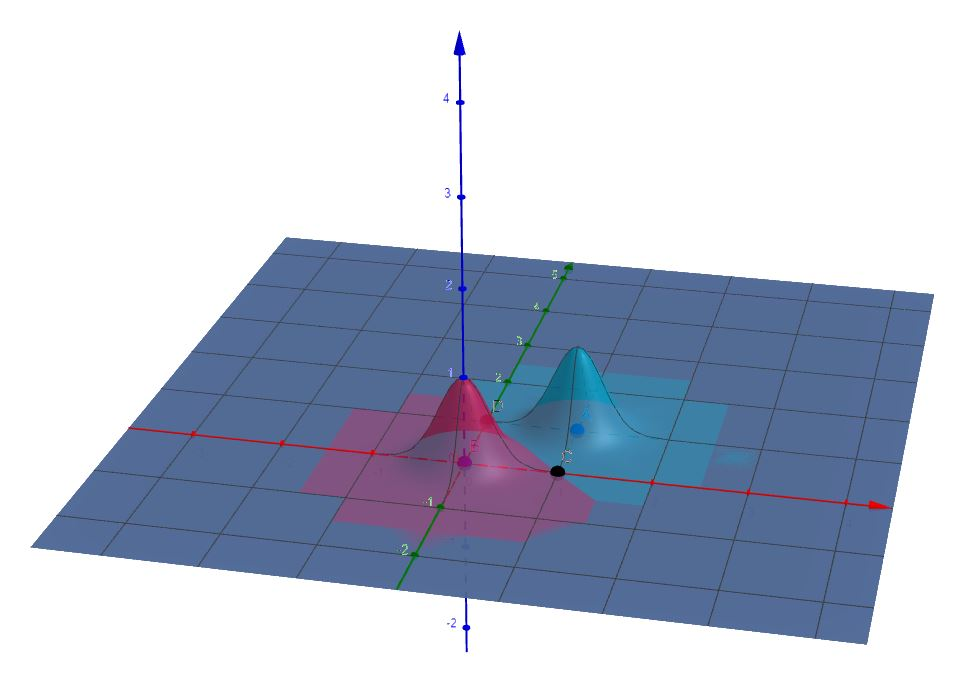

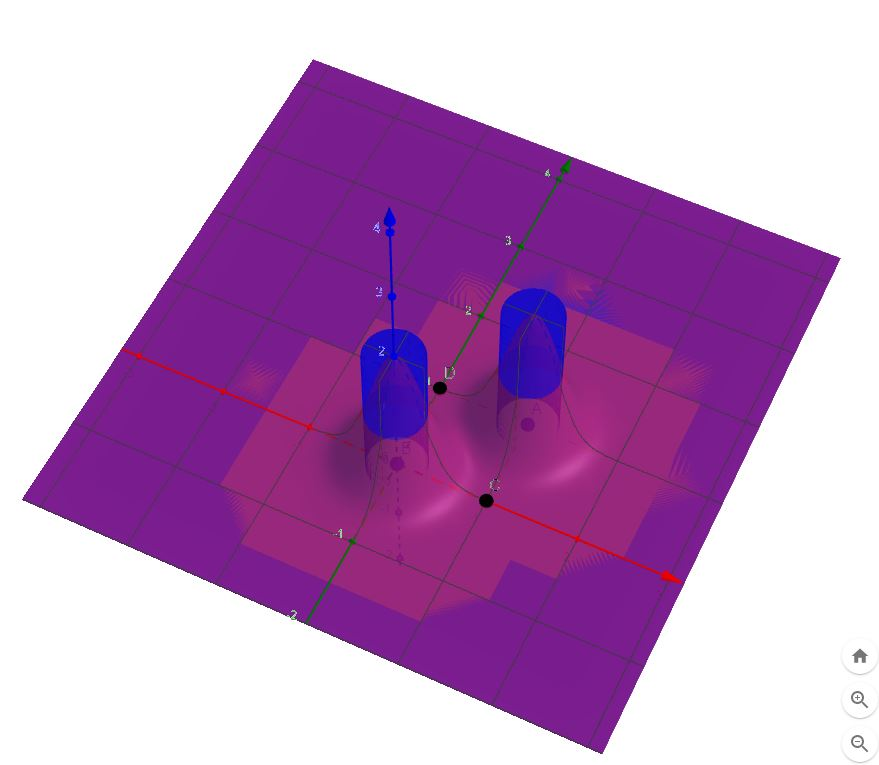

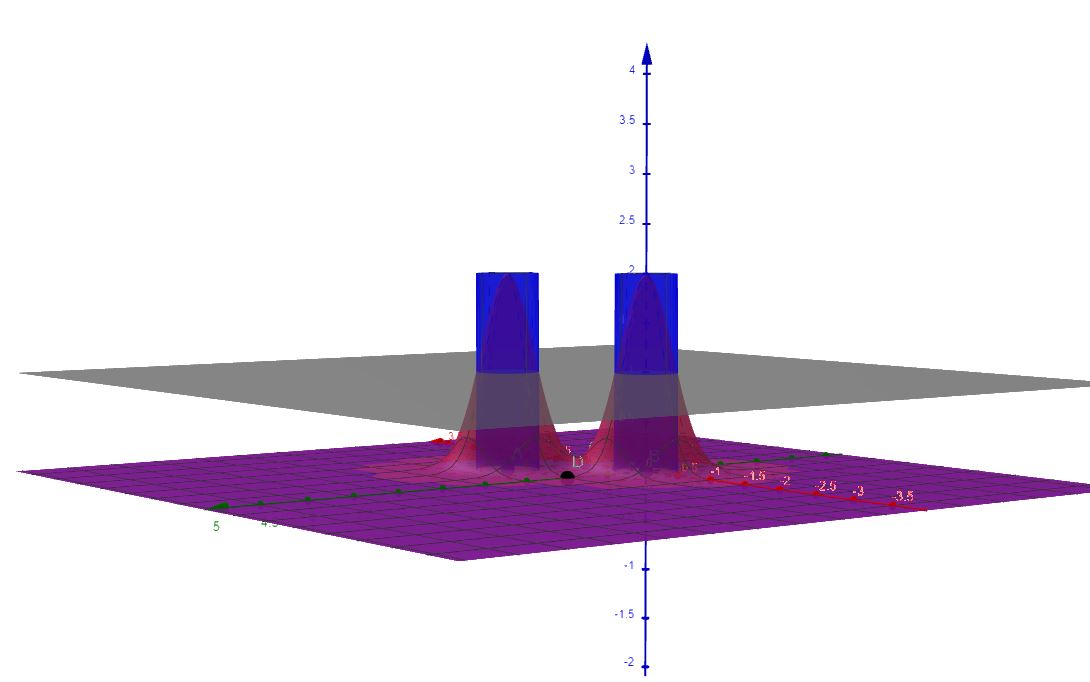

#### Radial Basis Function (RBF) kernel (Радіальна базисна функція ядра)
![gamma](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgutMLmdbNfk3dXHijIX5-3y66wi5rOWx1OmDYqHaLAcAo2VhNcwrIbf2qkDzkxmM2Bcwug6LnOoWpxTk9ilWNmIprvaAota4RIc51RigVxPApJc0g9MvbvuEASYFml0NGDgx_GafJ2qvwCnL48hWacGztf5AaCh8AWdqisf40Y36T83e2NKOSo46uleA/w466-h41/RBF%20gamma%20parameter.png)

Hyperparameters:
- Gamma: Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors

Kernels generalize the notion of ‘inner product similarity’.

In [28]:
# Radial Basis Function (RBF) kernel calculation
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
def rbf_kernel(X1, X2, gamma=1.0):
    dist_squared = np.sum((X1[:, np.newaxis] - X2) ** 2, axis=-1)
    return np.exp(-gamma * dist_squared)

# Calculate RBF kernel values
gamma = (1/(X.shape[1] * X.var()))
rbf_kernel_values = rbf_kernel(X, X, gamma=gamma)
rbf_kernel_values  # pairwise!

array([[1.        , 0.01831564, 0.13533528, 0.13533528],
       [0.01831564, 1.        , 0.13533528, 0.13533528],
       [0.13533528, 0.13533528, 1.        , 0.01831564],
       [0.13533528, 0.13533528, 0.01831564, 1.        ]])

In [51]:
gamma

np.float64(2.0)

In [48]:
X

array([[1, 1],
       [0, 0],
       [1, 0],
       [0, 1]])

In [50]:
X.var()

np.float64(0.25)

In [47]:
X.shape

(4, 2)

In [55]:
X[:, np.newaxis]

array([[[1, 1]],

       [[0, 0]],

       [[1, 0]],

       [[0, 1]]])

In [52]:
(X[:, np.newaxis]).shape

(4, 1, 2)

In [54]:
X[:, np.newaxis] - X

array([[[ 0,  0],
        [ 1,  1],
        [ 0,  1],
        [ 1,  0]],

       [[-1, -1],
        [ 0,  0],
        [-1,  0],
        [ 0, -1]],

       [[ 0, -1],
        [ 1,  0],
        [ 0,  0],
        [ 1, -1]],

       [[-1,  0],
        [ 0,  1],
        [-1,  1],
        [ 0,  0]]])

In [53]:
(X[:, np.newaxis] - X).shape

(4, 4, 2)

In [32]:
for i in X[:, np.newaxis]:
    for j in range(len(X)):
        print(i[0], "-", X[j], "=", (i - X[j])[0])
    print("")

[1 1] - [1 1] = [0 0]
[1 1] - [0 0] = [1 1]
[1 1] - [1 0] = [0 1]
[1 1] - [0 1] = [1 0]

[0 0] - [1 1] = [-1 -1]
[0 0] - [0 0] = [0 0]
[0 0] - [1 0] = [-1  0]
[0 0] - [0 1] = [ 0 -1]

[1 0] - [1 1] = [ 0 -1]
[1 0] - [0 0] = [1 0]
[1 0] - [1 0] = [0 0]
[1 0] - [0 1] = [ 1 -1]

[0 1] - [1 1] = [-1  0]
[0 1] - [0 0] = [0 1]
[0 1] - [1 0] = [-1  1]
[0 1] - [0 1] = [0 0]



In [33]:
(X[:, np.newaxis] - X) ** 2

array([[[0, 0],
        [1, 1],
        [0, 1],
        [1, 0]],

       [[1, 1],
        [0, 0],
        [1, 0],
        [0, 1]],

       [[0, 1],
        [1, 0],
        [0, 0],
        [1, 1]],

       [[1, 0],
        [0, 1],
        [1, 1],
        [0, 0]]])

In [56]:
arr = (X[:, np.newaxis] - X) ** 2
arr[0][1][0] = 5
arr

array([[[0, 0],
        [5, 1],
        [0, 1],
        [1, 0]],

       [[1, 1],
        [0, 0],
        [1, 0],
        [0, 1]],

       [[0, 1],
        [1, 0],
        [0, 0],
        [1, 1]],

       [[1, 0],
        [0, 1],
        [1, 1],
        [0, 0]]])

In [35]:
np.sum((X[:, np.newaxis] - X) ** 2, axis=-1)

array([[0, 2, 1, 1],
       [2, 0, 1, 1],
       [1, 1, 0, 2],
       [1, 1, 2, 0]])

In [36]:
# equivalent to
np.sum((X[:, np.newaxis] - X) ** 2, axis=2)

array([[0, 2, 1, 1],
       [2, 0, 1, 1],
       [1, 1, 0, 2],
       [1, 1, 2, 0]])

In [37]:
# equivalent to
arr = (X[:, np.newaxis] - X) ** 2
for i in arr:
    for j in i:
        print(j, ":", j[0], "+", j[1], "=", j[0]+j[1])
    print("")

[0 0] : 0 + 0 = 0
[1 1] : 1 + 1 = 2
[0 1] : 0 + 1 = 1
[1 0] : 1 + 0 = 1

[1 1] : 1 + 1 = 2
[0 0] : 0 + 0 = 0
[1 0] : 1 + 0 = 1
[0 1] : 0 + 1 = 1

[0 1] : 0 + 1 = 1
[1 0] : 1 + 0 = 1
[0 0] : 0 + 0 = 0
[1 1] : 1 + 1 = 2

[1 0] : 1 + 0 = 1
[0 1] : 0 + 1 = 1
[1 1] : 1 + 1 = 2
[0 0] : 0 + 0 = 0



In [38]:
-gamma * np.sum((X[:, np.newaxis] - X) ** 2, axis=-1)

array([[-0., -4., -2., -2.],
       [-4., -0., -2., -2.],
       [-2., -2., -0., -4.],
       [-2., -2., -4., -0.]])

In [39]:
np.exp(-gamma * np.sum((X[:, np.newaxis] - X) ** 2, axis=-1))

array([[1.        , 0.01831564, 0.13533528, 0.13533528],
       [0.01831564, 1.        , 0.13533528, 0.13533528],
       [0.13533528, 0.13533528, 1.        , 0.01831564],
       [0.13533528, 0.13533528, 0.01831564, 1.        ]])

In [40]:
import math
math.e**-2

0.1353352832366127

In [41]:
rbf_kernel_values

array([[1.        , 0.01831564, 0.13533528, 0.13533528],
       [0.01831564, 1.        , 0.13533528, 0.13533528],
       [0.13533528, 0.13533528, 1.        , 0.01831564],
       [0.13533528, 0.13533528, 0.01831564, 1.        ]])

In [42]:
# Built-in function in sklearn

from sklearn.metrics.pairwise import rbf_kernel
kernel_values = rbf_kernel(X, Y=None, gamma=gamma)
kernel_values

array([[1.        , 0.01831564, 0.13533528, 0.13533528],
       [0.01831564, 1.        , 0.13533528, 0.13533528],
       [0.13533528, 0.13533528, 1.        , 0.01831564],
       [0.13533528, 0.13533528, 0.01831564, 1.        ]])

In [43]:
X, kernel_values # true features (X) and "fake" features (kernel_values)

(array([[1, 1],
        [0, 0],
        [1, 0],
        [0, 1]]),
 array([[1.        , 0.01831564, 0.13533528, 0.13533528],
        [0.01831564, 1.        , 0.13533528, 0.13533528],
        [0.13533528, 0.13533528, 1.        , 0.01831564],
        [0.13533528, 0.13533528, 0.01831564, 1.        ]]))

#### Using support vectors to predict decision boundary

More info: https://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf

When applying kernel trick, decision boundary is calculated with the help of Kernel features (Instead of original X features)

In [44]:
# previously:
# model = SVC(kernel="rbf")
# model.fit(X, y)

# now:
m_precomputed = SVC(kernel="precomputed")
X_ = rbf_kernel(X, Y=None, gamma=gamma)
m_precomputed.fit(X_, y)

SVC(kernel='precomputed')

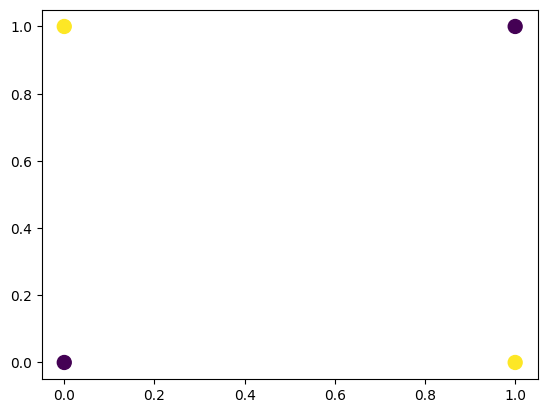

In [46]:
X_test = np.array([[0.6, 0.4]])

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1)
plt.show()

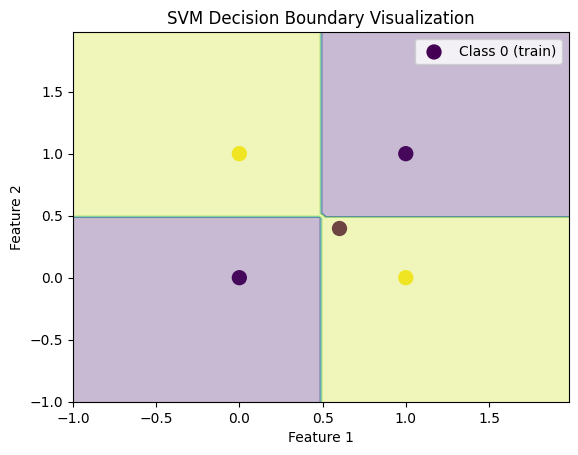

In [42]:
# At prediction time, kernel values are computed for the inputs first!!

X_test = np.array([[0.6, 0.4]])

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain predictions for test data
# Step 1: pick the support vectors
support_vectors = X
# Step 2: use the support vectors to calculate kernel values for test data
kernel_test = rbf_kernel(X_test, Y=support_vectors, gamma=gamma)  # support vectors!
# Step 3: use the model previously trained on train data and predict outputs for y based on the kernel values for test data
y_pred = m_precomputed.predict(kernel_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=100, alpha=1)

# Obtain decision boundary values for each point in the meshgrid (same process as for the test data)
kernel_grid = rbf_kernel(np.c_[xx.ravel(), yy.ravel()], Y=support_vectors, gamma=gamma)  # support vectors
Z = m_precomputed.predict(kernel_grid)
Z = Z.reshape(xx.shape)

# Plot decision boundary as a contour plot
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary Visualization')
plt.legend(labels=["Class 0 (train)"])

# Show the plot
plt.show()

In [43]:
y_pred

array([1])

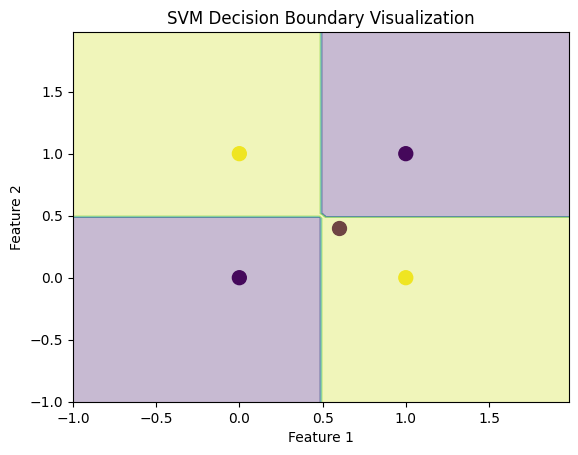

In [44]:
# With sklearn - analogously

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train an SVM model
model = SVC(kernel="rbf")  # select the right kernel and train with sklearn
model.fit(X, y)

y_pred = model.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=100, alpha=1)

# Obtain decision boundary values for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary as a contour plot
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary Visualization')

# Show the plot
plt.show()

In [45]:
y_pred = model.predict(X)
accuracy_score(y_pred, y)

1.0

In [46]:
support_vectors = model.support_vectors_
dual_coefficients = model.dual_coef_
support_vectors, dual_coefficients

(array([[1., 1.],
        [0., 0.],
        [1., 0.],
        [0., 1.]]),
 array([[-1., -1.,  1.,  1.]]))

## Multi-class classification
### Iris data

In [47]:
from sklearn.multiclass import OneVsRestClassifier

X = iris.data[:, :2]
y = iris.target
# define model
model = SVC()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X, y)
# make predictions
yhat = ovr.predict(X)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [48]:
ovr.__dict__

{'estimator': SVC(),
 'n_jobs': None,
 'verbose': 0,
 'label_binarizer_': LabelBinarizer(sparse_output=True),
 'classes_': array([0, 1, 2]),
 'estimators_': [SVC(), SVC(), SVC()],
 'n_features_in_': 2}

In [49]:
ovr.__dict__["estimators_"][0].__dict__["classes_"]
# 0 vs. 1 or 2
# 1 vs. 2 or 0
# 2 vs. 0 or 1

array([0, 1])

In [50]:
from sklearn.multiclass import OneVsOneClassifier

X = iris.data[:, :2]
y = iris.target
# define model
model = SVC()
# define the ovo strategy
ovo = OneVsOneClassifier(model)
# fit model
ovo.fit(X, y)
# make predictions
yhat = ovo.predict(X)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [51]:
ovo.__dict__

{'estimator': SVC(),
 'n_jobs': None,
 'n_features_in_': 2,
 'classes_': array([0, 1, 2]),
 'estimators_': (SVC(), SVC(), SVC()),
 'pairwise_indices_': None}

In [52]:
ovo.__dict__["estimators_"][0].__dict__['classes_']
# 0 vs. 1
# 1 vs. 2
# 0 vs. 2

array([0, 1])

In [53]:
model = svm.SVC(decision_function_shape='ovr')

### Iris data (RBF kernel)

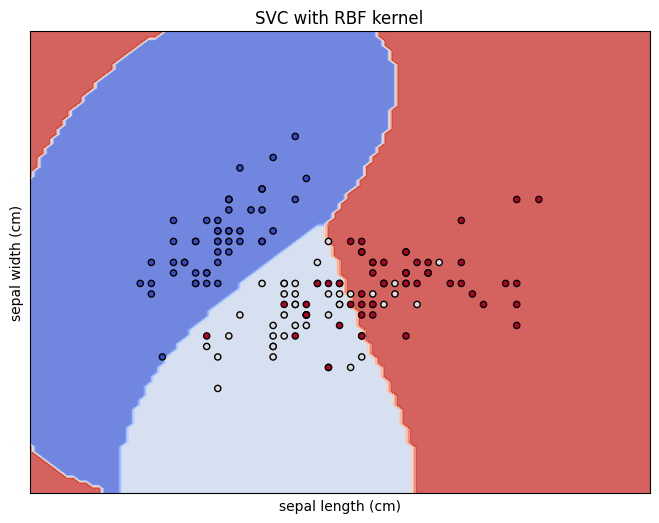

In [54]:
X = iris.data[:, :2]
y = iris.target

C = 1.0  # SVM regularization parameter
model = svm.SVC(kernel="rbf", gamma=0.7, C=C)
model.fit(X, y)

# title for the plots
title = "SVC with RBF kernel"

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

X0, X1 = X[:, 0], X[:, 1]

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

In [55]:
y_pred = model.predict(X)
accuracy_score(y_pred, y)

0.8266666666666667

### Other kernel functions

![kernel-functions](https://www.researchgate.net/profile/Hyunsoo-Lee-11/publication/341330102/figure/tbl3/AS:915511642697728@1595286393580/Four-Kernel-Functions-for-Kernel-based-SVM.png)

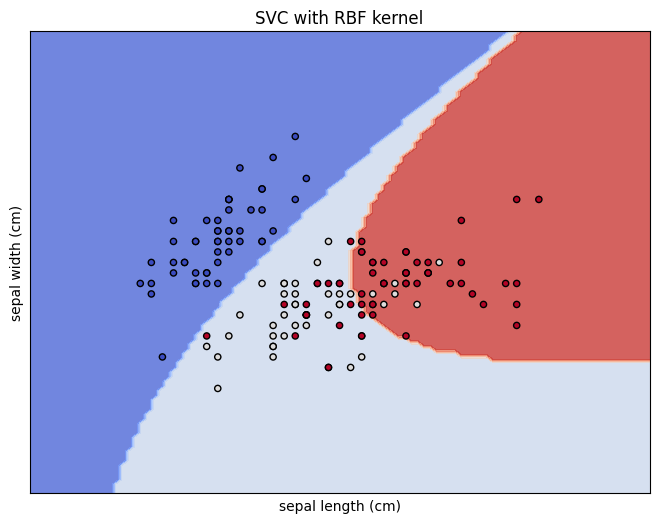

In [56]:
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
model = svm.SVC(kernel="poly", degree=3, gamma="auto", C=C)
model.fit(X, y)

# title for the plots
title = "SVC with RBF kernel"

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

X0, X1 = X[:, 0], X[:, 1]

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

In [57]:
y_pred = model.predict(X)
accuracy_score(y_pred, y)

0.8133333333333334

### With all features

Text(0, 0.5, 'Petal width')

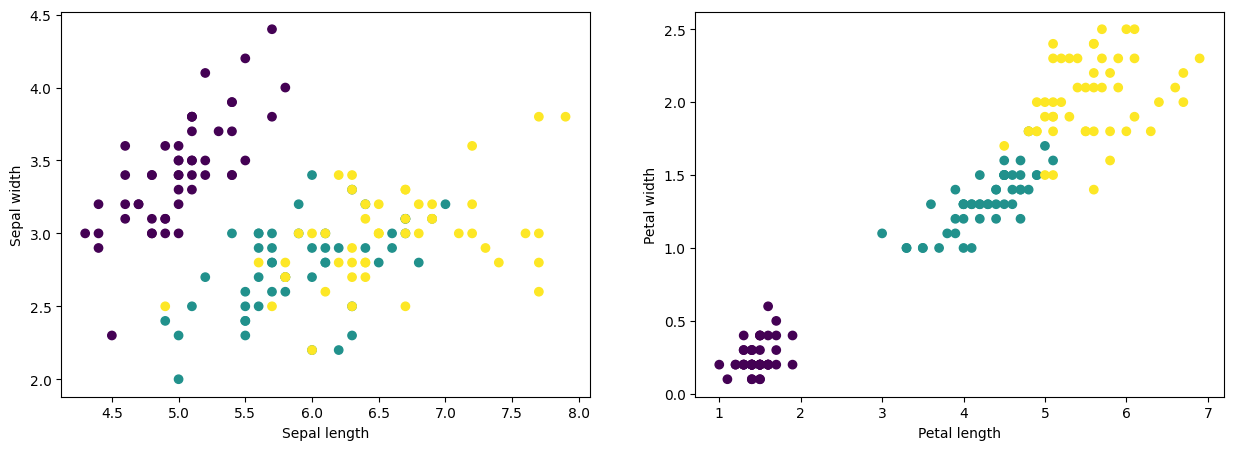

In [58]:
X = iris.data[:, :4]
y = iris.target

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.subplot(1,2,2)
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [59]:
# we create an instance of SVM and fit out data
X = iris.data[:, :4]
y = iris.target

C = 1.0  # SVM regularization parameter
model = svm.SVC(kernel="rbf", gamma=0.7, C=C)
model.fit(X, y)

y_pred = model.predict(X)
accuracy_score(y_pred, y)

0.98

See different kernel functions and different results: https://www.kaggle.com/code/joparga3/3-visualising-how-different-kernels-in-svms-work

## Loss function

See: https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-iii-5dff33fa015d

In [60]:
# Hinge Loss
from sklearn.metrics import hinge_loss
pred_decision = model.decision_function(X)
pred_decision[:10]

array([[ 2.23617716, -0.18869735,  0.82343601],
       [ 2.23397202, -0.18479552,  0.82459498],
       [ 2.235662  , -0.18807698,  0.82404688],
       [ 2.2338362 , -0.18484969,  0.82499993],
       [ 2.23659375, -0.18946571,  0.8232544 ],
       [ 2.22976166, -0.18133663,  0.83124702],
       [ 2.2328674 , -0.18512495,  0.82779154],
       [ 2.23582054, -0.18758599,  0.82306633],
       [ 2.230575  , -0.18205476,  0.83003201],
       [ 2.23329101, -0.18431997,  0.82577661]])

In [61]:
hinge_loss(y, pred_decision)

np.float64(0.0408985907907714)

## Hyperparameter Optimization

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import scipy.stats as stats
from scipy.stats import randint as sp_randint

In [63]:
# default parameters
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [64]:
X = iris.data[:, :4]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [65]:
np.logspace(-4, 0, 8)

array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00])

In [66]:
from sklearn import svm

# Cross validation grid search (best parameters)
c_range = np.logspace(-0, 4, 8)
gamma_range = np.logspace(-4, 0, 8)
tuned_parameters = [
    {
        'kernel': ['rbf'],
        'C': c_range,
        'gamma': gamma_range
    },
    {
        'kernel': ['linear'],
        'C': c_range,
        'gamma': gamma_range
    }
]

svc = svm.SVC()
clf = GridSearchCV(
    svc,
    param_grid=tuned_parameters,
    verbose=20,
    cv=4,
    scoring='explained_variance'
)
clf.fit(X_train, y_train)

print('Best score for data:', clf.best_score_)
print('Best C:', clf.best_estimator_.C)
print('Best Kernel:', clf.best_estimator_.kernel)
print('Best Gamma:', clf.best_estimator_.gamma)

Fitting 4 folds for each of 128 candidates, totalling 512 fits
[CV 1/4; 1/128] START C=1.0, gamma=0.0001, kernel=rbf...........................
[CV 1/4; 1/128] END C=1.0, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/4; 1/128] START C=1.0, gamma=0.0001, kernel=rbf...........................
[CV 2/4; 1/128] END C=1.0, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/4; 1/128] START C=1.0, gamma=0.0001, kernel=rbf...........................
[CV 3/4; 1/128] END C=1.0, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/4; 1/128] START C=1.0, gamma=0.0001, kernel=rbf...........................
[CV 4/4; 1/128] END C=1.0, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/4; 2/128] START C=1.0, gamma=0.0003727593720314938, kernel=rbf............
[CV 1/4; 2/128] END C=1.0, gamma=0.0003727593720314938, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/4; 2/128] START C=1.0, gamma=0.0003727593720314938, kernel=rbf............
[CV 2/4; 2/

In [67]:
best_model = clf.best_estimator_

In [68]:
y_train_pred = best_model.predict(X_train)
print("Train accuracy:", accuracy_score(y_train_pred, y_train))

Train accuracy: 0.9904761904761905


In [69]:
y_test_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test_pred, y_test))

Test accuracy: 0.9777777777777777


In [70]:
pred_decision = model.decision_function(X_test)
hinge_loss(y_test, pred_decision)

np.float64(0.047240664418190664)

## Bonus: Nearest Neighbors Classifier

In [71]:
from sklearn.neighbors import NearestNeighbors
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [72]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

Train accuracy: 0.8571428571428571
Test accuracy: 0.7333333333333333
Train accuracy: 0.9619047619047619
Test accuracy: 0.7111111111111111


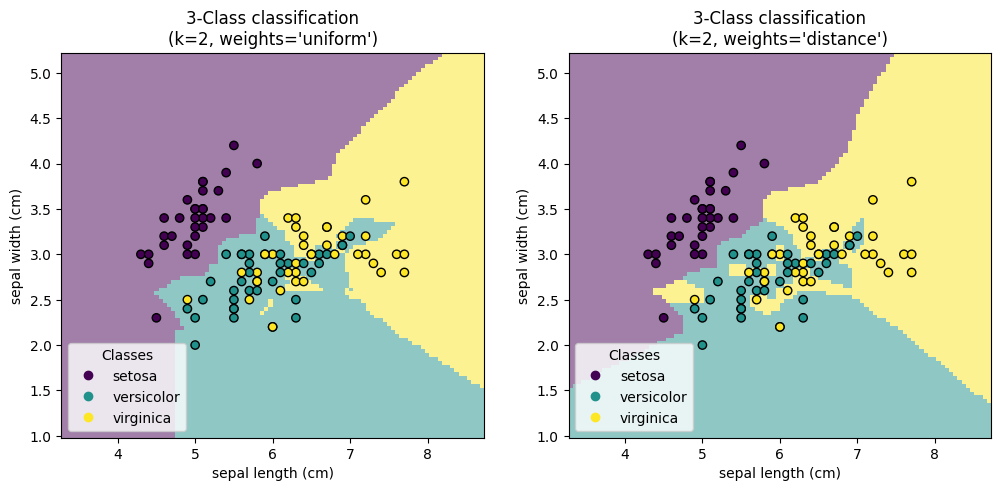

In [73]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=2))]
)
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )
    y_train_pred = clf.predict(X_train)
    print("Train accuracy:", accuracy_score(y_train_pred, y_train))
    y_test_pred = clf.predict(X_test)
    print("Test accuracy:", accuracy_score(y_test_pred, y_test))

plt.show()

Train accuracy: 0.8
Test accuracy: 0.7333333333333333
Train accuracy: 0.9619047619047619
Test accuracy: 0.7555555555555555


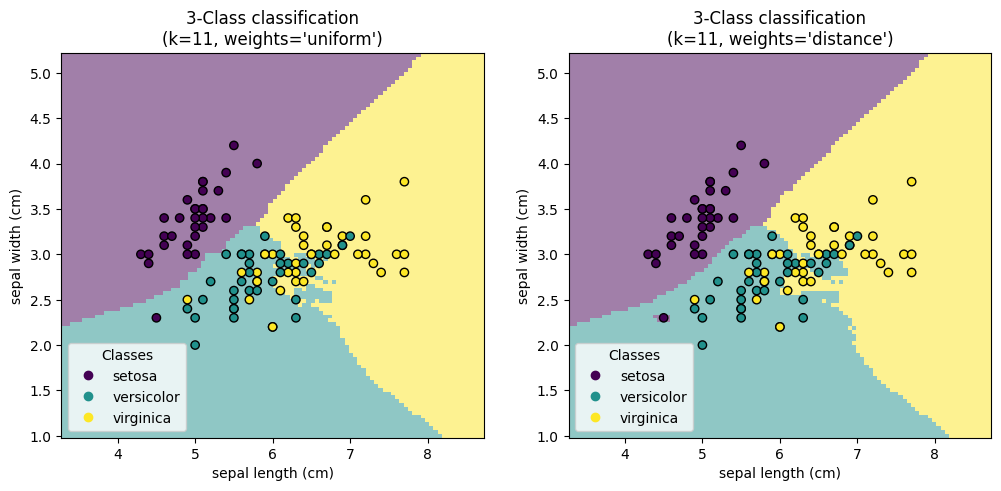

In [74]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )
    y_train_pred = clf.predict(X_train)
    print("Train accuracy:", accuracy_score(y_train_pred, y_train))
    y_test_pred = clf.predict(X_test)
    print("Test accuracy:", accuracy_score(y_test_pred, y_test))

plt.show()